In [10]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
data = pd.read_csv('../data/data_geo_hosp.csv').drop(columns=['state_fips_code', 'county_fips_code', 'case_month'])
data

,hosp_yn,death_yn,sex_female,age_0,age_18,age_50,age_65,race_native,race_asian,race_black,race_other,race_native_pacific,race_white,ethnicity_hispanic,case_onset_interval,symptom_status,used_bed_ratio,used_icu_ratio
0,False,False,True,False,True,False,False,False,True,False,False,False,False,True,0,True,0.718141,0.451212
1,False,False,True,False,True,False,False,False,False,False,True,False,False,True,0,True,0.746529,0.774469
2,False,False,True,False,True,False,False,False,False,False,False,False,True,True,0,True,0.866410,0.755197
3,False,False,True,False,True,False,False,False,False,False,False,False,True,True,0,True,0.761232,0.659091
4,False,False,True,False,True,False,False,False,False,False,False,False,True,True,0,True,0.660607,0.855514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151441,False,False,False,True,False,False,False,False,False,False,False,False,True,True,0,True,0.677033,0.612624
3151442,False,False,False,True,False,False,False,False,False,False,False,False,True,True,0,True,0.677033,0.612624
3151443,False,False,False,True,False,False,False,False,False,False,False,False,True,True,0,True,0.677033,0.612624
3151444,False,False,False,True,False,False,False,False,False,False,False,False,True,True,0,True,0.677033,0.612624


In [12]:
Z = data.iloc[:, :].values
X = Z[:, 2:]

In [13]:
pca_score = {'n_components': [], 'score': [], 'explained_variance_ratio_': []}

for n_components in tqdm(range(X.shape[1])):
    pca_score['n_components'].append(n_components)
    pca = PCA(n_components=n_components).fit(X)
    pca_score['score'].append(pca.score(X))
    pca_score['explained_variance_ratio_'].append(pca.explained_variance_ratio_)

100%|██████████| 16/16 [02:05<00:00,  7.82s/it]


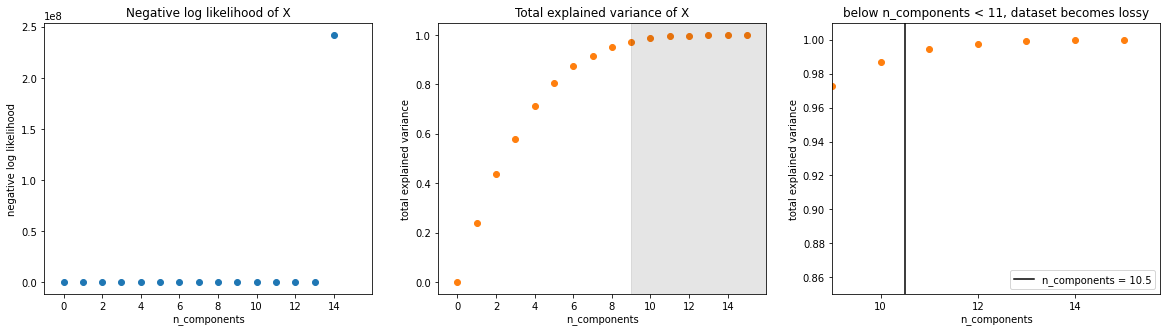

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.scatter(pca_score['n_components'], pca_score['score'])
ax1.set_xlabel('n_components'); ax1.set_ylabel('negative log likelihood')
ax1.set_title('Negative log likelihood of X'); ax1.set_xticks(range(0, 16, 2)); ax1.set_xlim(-1, 16);

ax2.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax2.set_xlabel('n_components'); ax2.set_ylabel('total explained variance'); ax2.axvspan(9, 18, color='black', alpha=0.1)
ax2.set_title('Total explained variance of X'); ax2.set_xticks(range(0, 16, 2)); ax2.set_xlim(-1, 16);

ax3.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax3.set_xlabel('n_components'); ax3.set_ylabel('total explained variance'); ax3.set_xticks(range(0, 16, 2)); ax3.set_xlim(9, None); ax3.set_ylim(0.85, 1.01)
ax3.axvline(10.5, color='black', label='n_components = 10.5'); ax3.set_title('below n_components < 11, dataset becomes lossy'); ax3.legend();